# Visualize profiles with different concentrations

*6 May 2024*

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM
from astropy import constants as c
from astropy import units as u
cosmo = FlatLambdaCDM(H0=67.5, Om0=0.316)

In [3]:
zl = 0.5
rho_crit = cosmo.critical_density(zl).to(u.Msun/u.kpc**3)

In [4]:
rho_crit

<Quantity 221.35532144 solMass / kpc3>

In [5]:
def concentration_mass_ratio(c, tau):
    # M200 / Mtot
    numerator = (tau**2 - 1) * np.log((1+c)**2/(1+c**2/tau**2)) + 2*(tau**2+1)*(-c/(c+1)) + 4*tau*np.arctan(c/tau)
    denominator = (tau**2 - 1) * np.log(tau**2) - 2 * (tau**2 + 1) + 2 * np.pi * tau
    return numerator/denominator

def rs(mtot, c, tau):
    return 1/c * (3 * mtot / (4*200*np.pi * rho_crit) * concentration_mass_ratio(c, tau))**(1/3.)

In [6]:
def rho(r, rscale, tau):
    """ using tNFW """
    deltac = (rscale**3 * tau**2/(2*(tau**2+1)**2) * ((tau**2-1)*np.log(tau**2)-2*(tau**2+1)+2*np.pi*tau))**-1
    # This definition of deltac just ensures that the total mass is consistent
    rho0 = 4 * deltac * rho_crit.value
    r_ratio = r/rscale
    return rho0 / (r_ratio * (1+r_ratio)**2) / (1+(r_ratio / tau)**2)

In [7]:
tau = 20
rs60 = rs(1e6 * u.Msun, 60, tau).to(u.kpc).value
rs15 = rs(1e6 * u.Msun, 15, tau).to(u.kpc).value

print(rs60, rs15)

rlist = np.logspace(-5, 2, 100)
rholist15 = rho(rlist, rs15, tau)
rholist60 = rho(rlist, rs60, tau)

0.028989227655810103 0.10753236342692632


Text(0.5, 1.0, 'Same total mass; different concentration')

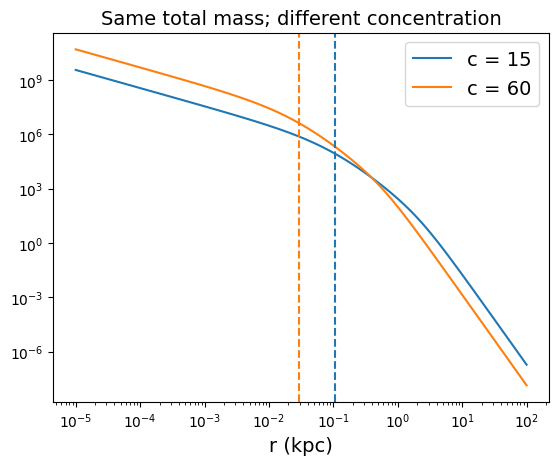

In [8]:
plt.loglog(rlist, rholist15, label='c = 15')
plt.loglog(rlist, rholist60, label='c = 60')
plt.axvline(rs15, linestyle='--', color='C0')
plt.axvline(rs60, linestyle='--', color='C1')
plt.legend(fontsize=14)
plt.xlabel('r (kpc)', fontsize=14)
plt.title('Same total mass; different concentration', fontsize=14)

Text(0.5, 1.0, 'Same total mass; different concentration')

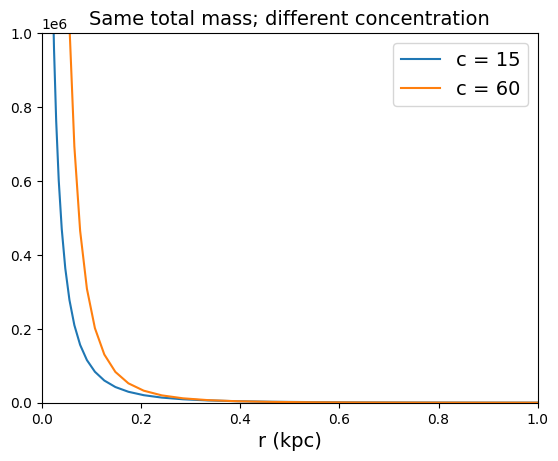

In [10]:
plt.plot(rlist, rholist15, label='c = 15')
plt.plot(rlist, rholist60, label='c = 60')
#plt.axvline(rs15, linestyle='--', color='C0')
#plt.axvline(rs60, linestyle='--', color='C1')
plt.legend(fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 1000000)
plt.xlabel('r (kpc)', fontsize=14)
plt.title('Same total mass; different concentration', fontsize=14)